## Strava Analysis - BVRT Training

### Tasks to complete
1. Import and cleanse strava extract
2. Create dataframe for analysis
3. Compare BVRT training periods to optimise performance in 2021

In [93]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Import and cleanse strava extract
1. Changing column headers to lower case
2. Striping out the whitespace
3. Replacing spaces with underscores
4. Update dataframe to include Run activities and reset index
4. Converting the activity date from a string to date time
5. Create new date dimension for analysis purposes
6. Create dataframe for analysis

In [10]:
df = pd.read_csv('activities.csv', usecols=['Activity Date','Activity Type','Elapsed Time','Moving Time','Distance','Elevation Gain'])

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df = df[df['activity_type']=='Run']
df['activity_date'] = pd.to_datetime(df['activity_date'])
df['activity_month'] = df['activity_date'].dt.date
df['activity_month'] = df['activity_month'] + pd.offsets.MonthEnd(0) 
df['year'] = pd.DatetimeIndex(df['activity_date']).year

### Create new dataframe
1. Create dataframe for 2019 activities
2. Add in new columns
3. Categorise run distance and time

In [138]:
data = df[df['year']==2019].copy()
data['activity_mins'] = data['elapsed_time'] / 60
data['activity_hrs'] = (data['elapsed_time'] / 60) / 60
data['long_run_distance'] = np.where(data['distance']>= 20, True, False)
data['long_run_time'] = np.where(data['activity_hrs']>= 2, True, False)
data.reset_index(drop=True, inplace=True)

### Define what months we want to keep for analysis
1. We only want the months from January to June for this analysis

In [139]:
keep = ['2019-01-31','2019-02-28','2019-03-31','2019-04-30','2019-05-31','2019-06-30']

In [140]:
data = data[data['activity_month'].isin(keep)]

### Create dataframe for analysis in 2019 Run activities
1. Create dataframe for analysis
2. Look at monthly volume
3. Look at vertical gain to gauge how much this helps overall training
4. How important is time of feet compared to volume
4. Compare the training block for BVRT

In [141]:
analysis = pd.DataFrame(data, columns=['activity_month','distance','elevation_gain','activity_hrs','long_run_distance','long_run_time'])

In [142]:
analysis.groupby(['activity_month']).sum()

,distance,elevation_gain,activity_hrs,long_run_distance,long_run_time
activity_month,,,,,
2019-01-31,269.68,4011.023277,26.266667,1.0,1.0
2019-02-28,252.28,3860.089386,25.581667,0.0,1.0
2019-03-31,275.64,4513.778149,27.554167,4.0,4.0
2019-04-30,328.02,4904.748258,31.795556,3.0,3.0
2019-05-31,335.09,759.000000,32.911944,4.0,4.0
2019-06-30,372.76,2034.200684,40.205000,3.0,3.0


### Create dataframes for monthly volume, vertical gain and time of feet (TOF)

In [125]:
volume_analysis = analysis.groupby(['activity_month'])['distance'].sum()

In [126]:
vert_analysis = analysis.groupby(['activity_month'])['elevation_gain'].sum()

In [127]:
tof_analysis = analysis.groupby(['activity_month'])['activity_hrs'].sum()

### Plot the results

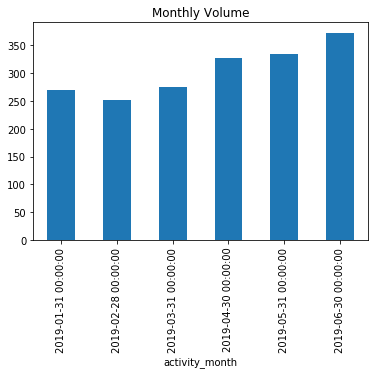

In [128]:
volume_analysis.plot.bar(x='activity_month', y='distance',title='Monthly Volume')

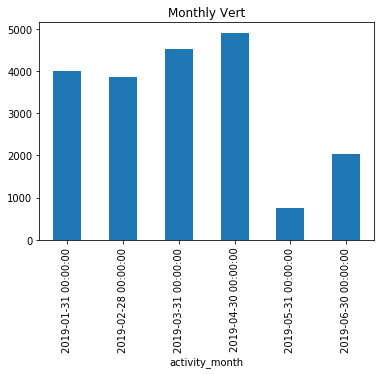

In [129]:
vert_analysis.plot.bar(x='activity_month', y='elevation_gain',title='Monthly Vert')

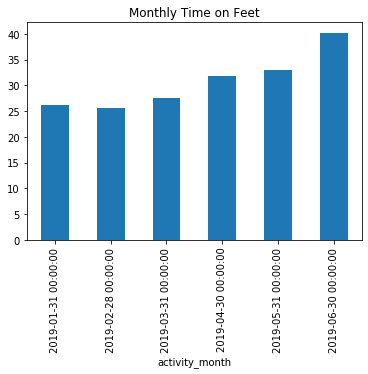

In [130]:
tof_analysis.plot.bar(x='activity_month', y='activity_hrs',title='Monthly Time on Feet')